Сеть отелей «Как в гостях» для привлечения клиентов, добавила на свой сайт возможность бронирования номера без предоплаты. Если клиент отменяет бронирование отель терпит убытки. Чтобы решить эту проблему, нам нужно разработать систему, которая предсказывает отказ от брони и минимизирует издержки сети отелей.  

**Цель:** разработка модели, предсказывающей отмену брони.

**Задачи:**
1. Загрузка и подготовка данных.
2. Исследовательский анализ данных.
3. Вычисление бизнес-метрики.
4. Разработка модели ML.
5. Выявление признаков 'ненадёжного' клиента.
6. Общий вывод.

**Предмет исследования** выборка данных по клиентам сети отелей «Как в гостях».

**Методы:**
которые мы применим в данном исследовании включают в себя: ознакомление, предобработку, исследовательский анализ данных, обучения моделей машинного обучения, повышение метрик моделей.

**Структура проекта:**
проектная работа состоит из обзора и предобработки данных, вычисление бизнес-метрик, разработки и тестирования моделей, выявления признаков 'ненадежного' клиента и общего вывода.


### Шаг 1. Откройте файлы с данными

In [1]:
 # Импортируем необходимые библиотеки:
import copy
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, make_scorer

In [2]:
 # Настройка параметров отображения максимального количества столбцов:
pd.set_option('display.max_columns', None)

Присвоим переменным: train_data и test_data значения наших датасетов: 'hotel_train.csv' и 'hotel_test.csv' соответственно:

In [3]:
train_data = pd.read_csv('/datasets/hotel_train.csv')
test_data = pd.read_csv('/datasets/hotel_test.csv')

Поместим наши датасеты в словарь 'data_dict':

In [4]:
data_dict = {'train_data': train_data,
             'test_data': test_data}

Проверим корректность загрузки - выводим по пять первых строк, каждого из датасетов:

In [5]:
for dataset in data_dict:
    
    print(dataset)
    display(data_dict[dataset].head())

train_data


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,0.0,0.0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


test_data


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


### Шаг 2. Предобработка и исследовательский анализ данных

Размеры датасетов:

In [6]:
for dataset in data_dict:
    
    size = data_dict[dataset].shape
    print(f'Размер датасета {dataset} {size}')

Размер датасета train_data (65229, 25)
Размер датасета test_data (32412, 25)


Распределение наблюдений в разрезе годов:

In [7]:
for dataset in data_dict:
    
    print(f'{dataset} содержит информацию по годам:')
    
    for year in list(data_dict[dataset]['arrival_date_year'].unique()):
        
        string_qnt = len(data_dict[dataset].query('arrival_date_year == @year'))
        
        print(f'{year} год - {string_qnt} записей')

train_data содержит информацию по годам:
2015 год - 18328 записей
2016 год - 46901 записей
test_data содержит информацию по годам:
2017 год - 32412 записей


Проверим пропущенные значения:

In [8]:
for dataset in data_dict:
    
    print(dataset)
    print()
    print(data_dict[dataset].isna().sum())

train_data

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64
test_data

id                                0
is_canceled                 

Пропущенных значений - не онаруженно.

Посмотрим на диапазоны значений данных:

In [9]:
for dataset in data_dict:
    
    print(dataset)
    display(data_dict[dataset].describe())

train_data


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


test_data


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.000000,32412.0,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,60131.505183,0.388467,97.587869,2017.0,17.804054,15.656948,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,29953.586177,0.487409,86.507146,0.0,9.177384,8.766429,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,6086.000000,0.000000,0.000000,2017.0,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,45291.750000,0.000000,23.000000,2017.0,10.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,53394.500000,0.000000,76.000000,2017.0,18.000000,15.500000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,89800.250000,1.000000,155.000000,2017.0,25.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,97903.000000,1.000000,373.000000,2017.0,35.000000,31.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


На первый взгляд все в порядке за исключением кол-ва младенцев, 10 - аномальное значение.

Проверим типы данных:

In [10]:
for dataset in data_dict:
    
    print(dataset)
    print()
    display(data_dict[dataset].info())

train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                

None

test_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                 

None

Данные в столбцах `lead_time`, `adults`, `children`, `babies` приведем к типу `int`:

In [11]:
int_columns = ['lead_time', 'adults', 'children', 'babies']

for dataset in data_dict:
    
    for column in int_columns:
        
        data_dict[dataset][column] = data_dict[dataset][column].astype('int')

Обнаружены пробелы в значениях столбцов 'meal', 'reserved_room_type':

In [12]:
replace_columns = ['meal', 'reserved_room_type']

for dataset in data_dict:
    for column_name in replace_columns:
        print(data_dict[dataset][column_name].unique())

['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']
['A               ' 'C               ' 'D               '
 'E               ' 'G               ' 'F               '
 'B               ']
['BB       ' 'HB       ' 'SC' 'FB       ' 'SC       ']
['A               ' 'E               ' 'G               '
 'D               ' 'F               ' 'C               '
 'B               ']


Обработаем пробелы при помощи функции `replace_func`:

In [13]:
def replace_func(series):
    
    return series.replace(r'\s+','',regex=True)

Применим функцию `replace_func` ко всем датасетам, построчно:

In [14]:
for dataset in data_dict:
    
    for column in replace_columns:
        
        data_dict[dataset][column] = replace_func(data_dict[dataset][column])
        print(data_dict[dataset][column].unique())

['BB' 'FB' 'HB' 'SC']
['A' 'C' 'D' 'E' 'G' 'F' 'B']
['BB' 'HB' 'SC' 'FB']
['A' 'E' 'G' 'D' 'F' 'C' 'B']


В столбце `arrival_date_month` - месяц прибытия, заменим наименование месяца на его числовой эквивалент календарного исчисления:

In [15]:
for dataset in data_dict:
    print(dataset)
    print(data_dict[dataset]['arrival_date_month'].unique())

train_data
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
test_data
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Обратим внимание на то что на тестовый датасет имеет данные только за 8 месяцев 2017 года.

In [16]:
d = {'January': 1, 
     'February': 2, 
     'March': 3, 
     'April': 4,
     'May': 5,
     'June': 6,
     'July': 7,
     'August': 8,
     'September': 9,
     'October': 10,
     'November': 11,
     'December': 12}

for dataset in data_dict:
    
    data_dict[dataset].arrival_date_month = data_dict[dataset].arrival_date_month.map(d)

Удалим колонку 'id' из наших датасетов она не несет никакой информации кроме номера записи:

In [17]:
drop_columns_list = ['id']

for dataset in data_dict:

    data_dict[dataset] = data_dict[dataset].drop(columns=drop_columns_list)

Проверим наши датасеты на дубликаты:

In [18]:
for dataset in data_dict:
    
    duplicated_qnt = data_dict[dataset].duplicated().sum()
    print(f'В датасете {dataset} обнаруженно {duplicated_qnt} дублированных записей')

В датасете train_data обнаруженно 21377 дублированных записей
В датасете test_data обнаруженно 7717 дублированных записей


In [19]:
data_dict['train_data'][data_dict['train_data'].duplicated(keep=False)].head(20)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
12,0,72,2015,7,27,1,2,4,2,0,0,BB,PRT,Direct,0,0,0,A,1,0,Transient,0,1,6
13,0,72,2015,7,27,1,2,4,2,0,0,BB,PRT,Direct,0,0,0,A,1,0,Transient,0,1,6
82,1,5,2015,7,28,5,1,0,2,0,0,BB,PRT,TA/TO,0,0,0,D,0,0,Transient,0,0,1
85,1,5,2015,7,28,5,1,0,2,0,0,BB,PRT,TA/TO,0,0,0,D,0,0,Transient,0,0,1
113,0,0,2015,7,28,7,0,1,1,0,0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,3,1
115,0,0,2015,7,28,7,0,1,1,0,0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,3,1
126,1,1,2015,7,28,8,0,1,2,0,0,BB,PRT,Corporate,0,0,0,A,0,0,Transient,0,1,1
127,1,1,2015,7,28,8,0,1,2,0,0,BB,PRT,Corporate,0,0,0,A,0,0,Transient,0,1,1
216,0,40,2015,7,29,13,1,4,2,0,0,BB,ESP,Direct,0,0,0,D,0,0,Transient,0,2,5
219,0,40,2015,7,29,13,1,4,2,0,0,BB,ESP,Direct,0,0,0,D,0,0,Transient,0,2,5


Датасеты имеют множество дублированных записей отличающихся только колонкой 'id' причем записи расположены в непосредственной близости относительно индексов, похоже на программную ошибку при выгрузке данных, избавимся от дубликатов:

In [20]:
for dataset in data_dict:
    first_len = len(data_dict[dataset])
    data_dict[dataset] = data_dict[dataset].drop_duplicates()
    qnt = first_len - len(data_dict[dataset])
    
    print(f' В датасете {dataset} удалено {qnt} записей')

 В датасете train_data удалено 21377 записей
 В датасете test_data удалено 7717 записей


Проверим распределение целевого признака 'is_canceled' в датасетах:

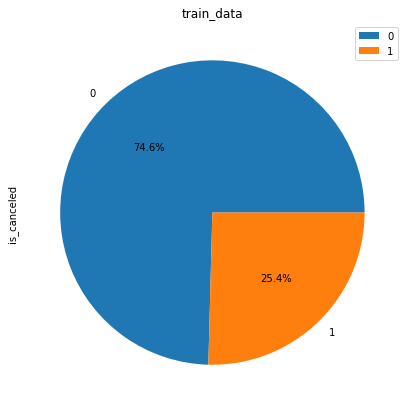

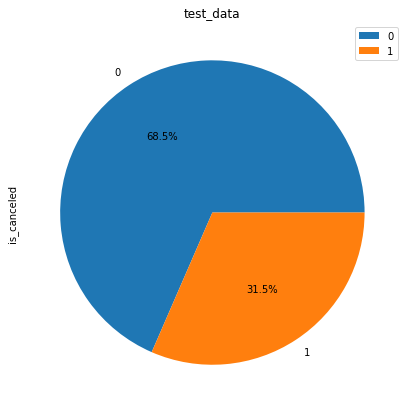

In [21]:
for dataset in data_dict:
    data_dict[dataset]['is_canceled'].value_counts(1).plot(kind='pie', legend=True, autopct='%1.1f%%', figsize=(7, 7), title=dataset)
    plt.show()

Наблюдаем явную разбалансировку данных, всего 25 процентов целевого признака в тренировочном датасете

У некоторых постояльцев мы обнаружили 9 и 10 младенцев - явно аномалия, избавимся от этих строк:

In [22]:
for dataset in data_dict:
    print(dataset)
    print(data_dict[dataset]['babies'].value_counts())

train_data
0     43403
1       444
2         3
9         1
10        1
Name: babies, dtype: int64
test_data
0    24521
1      170
2        4
Name: babies, dtype: int64


In [23]:
data_dict['train_data'] = data_dict['train_data'].query('babies < 3')

Также мы обнаружили строки в которых не классифицирован тип клиента: взрослый, ребенок, младенец - похоже что это явные аномалии, мы не можем установить адекватного значения заполнения этих строк, удалим их:

In [24]:
for dataset in data_dict:
    
    anomaly_rows = data_dict[dataset][['adults', 'children', 'babies', 'is_canceled', 'total_nights']].query('adults == children == babies == 0')
    first_len = len(data_dict[dataset])
    
    print(dataset)
    display(anomaly_rows)
    data_dict[dataset] = data_dict[dataset].drop(anomaly_rows.index)
    
    qnt_delete_rows = first_len - len(data_dict[dataset])
    
    print(f'Удалено {qnt_delete_rows}строк из датасета {dataset}')
    print('')

train_data


,adults,children,babies,is_canceled,total_nights
23770,0,0,0,0,6
26878,0,0,0,0,6
26879,0,0,0,0,6
31570,0,0,0,0,8
41461,0,0,0,0,3
50744,0,0,0,0,6
54881,0,0,0,0,7
56674,0,0,0,0,4
57390,0,0,0,0,4
58416,0,0,0,0,9


Удалено 15строк из датасета train_data

test_data


,adults,children,babies,is_canceled,total_nights
18333,0,0,0,0,2
21214,0,0,0,0,3
25596,0,0,0,0,1
28463,0,0,0,0,5
28821,0,0,0,0,3
29808,0,0,0,0,2
30052,0,0,0,0,7


Удалено 7строк из датасета test_data



Создаем допонительные датасеты для `OH` и `OHE` кодирования для разных типов моделей:

In [25]:
preop_data_dict_oe = copy.deepcopy(data_dict)
preop_data_dict_ohe = copy.deepcopy(data_dict)

Судя по описанию, `total_nights` — это сумма `stays_in_week_nights` и `stays_in_weekend_nights`, удалим `total_nights` т.к. его можно получить из двух других столбцов:

Таже можем удаляем столбецы  `'total_nights', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number'` т.к. они не несут информации для модели:

In [26]:
drop_columns = ['total_nights']

for dataset in preop_data_dict_oe:
    preop_data_dict_oe[dataset] = preop_data_dict_oe[dataset].drop(columns=drop_columns, axis=1)

for dataset in preop_data_dict_ohe:
    preop_data_dict_ohe[dataset] = preop_data_dict_ohe[dataset].drop(columns=drop_columns, axis=1)

Производим OE кодирование категоральных признаков

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

cat_columns = list(preop_data_dict_oe['train_data'].select_dtypes(include='object').columns)

for dataset in preop_data_dict_oe:
    for column in cat_columns:
        preop_data_dict_oe[dataset][[column]] = enc.fit_transform(preop_data_dict_oe[dataset][[column]])
    

Производим OHE кодирование категоральных признаков

In [28]:
ohe_columns = ['meal', 'distribution_channel', 'reserved_room_type', 'customer_type']

for dataset in preop_data_dict_ohe:
    
    preop_data_dict_ohe[dataset] = pd.get_dummies(data=preop_data_dict_ohe[dataset], columns = ohe_columns, drop_first=True)      

In [29]:
for dataset in preop_data_dict_ohe:
    preop_data_dict_ohe[dataset] = preop_data_dict_ohe[dataset].drop(columns='country', axis=1)

Построим корреляционную матрицу для тренировочного датасета:

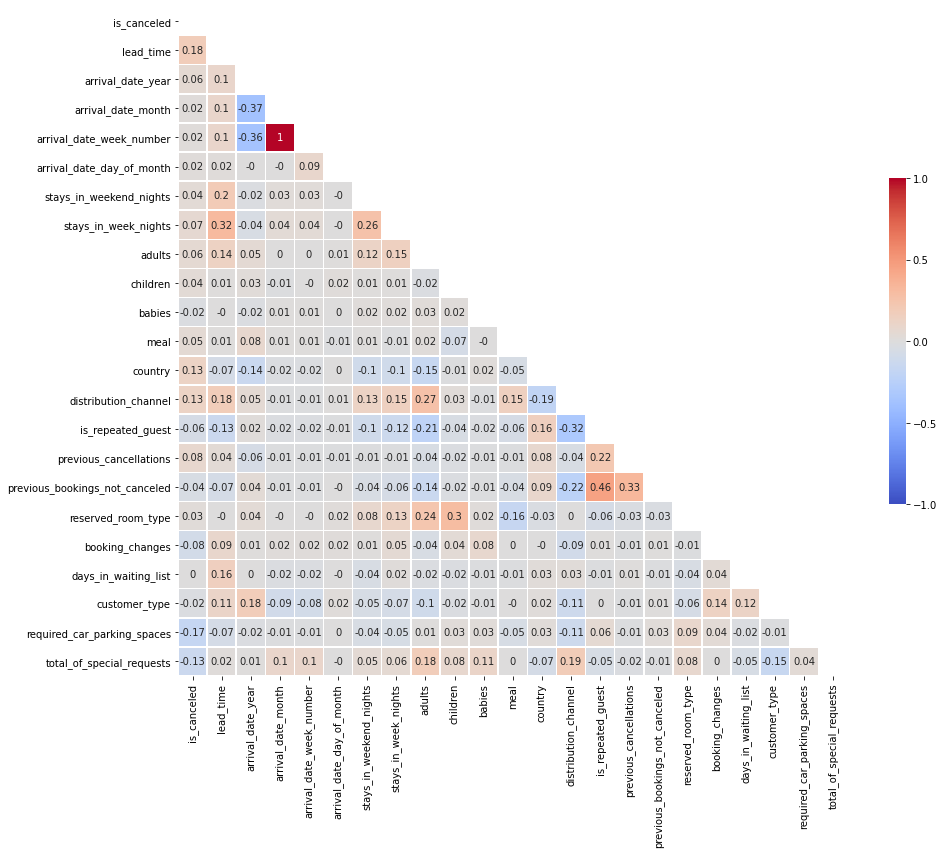

In [30]:
corr_matrix = preop_data_dict_oe['train_data'].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool_))

f, ax = plt.subplots(figsize=(15, 15)) 
heatmap = sns.heatmap(round(corr_matrix, 2), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

Стоимость за ночь, стоимость разовой уборки номера, сезонные коэфициенты, бюджет и процент депозита:

In [31]:
NIGHT_PRICE_DICT = {'A': 1000,
                    'B': 800,
                    'C': 600,
                    'D': 550,
                    'E': 500,
                    'F': 450,
                    'G': 350}

SERVICE_PRICE_DICT = {'A': 400,
                      'B': 350,
                      'C': 350,
                      'D': 150,
                      'E': 150,
                      'F': 150,
                      'G': 150}

SUMMER_COEFFICIENT = .4
SPRING_COEFFICIENT = .2
AUTUMN_COEFFICIENT = .2

ML_BUDGET = 400000

DEPOSIT = .8

Функция profit для подсчета прибыли без учета предсказаний модели:

In [32]:
def profit(row):
    
    room_type = row['reserved_room_type']
    total_nights = row['total_nights']
    month = row['arrival_date_month']
    price_per_night = NIGHT_PRICE_DICT[row['reserved_room_type']]
    koeficient = 1
    
    if 6 <= month <= 8:
        
        koeficient += SUMMER_COEFFICIENT
        
    elif 3 <= month <= 5:
        
        koeficient += SPRING_COEFFICIENT
        
    elif 9 <= month <= 11:
        
        koeficient += AUTUMN_COEFFICIENT

    if row['is_canceled'] == 0:
        
        return total_nights * price_per_night * koeficient - SERVICE_PRICE_DICT[room_type] * (1 + total_nights // 2)
            
    else:
        
        return - price_per_night * koeficient - SERVICE_PRICE_DICT[room_type]
    

In [33]:
data_dict['test_data']['profit'] = test_data.apply(profit, axis=1)

no_model_profit = data_dict['test_data']['profit'].sum()
no_model_loss = -data_dict['test_data'].query('is_canceled == 1')['profit'].sum()

print(f'Чистая прибыль без внедрения модели составила {no_model_profit}, при убытке {no_model_loss}')

Чистая прибыль без внедрения модели составила 32661180.0, при убытке 10571770.0


### Шаг 4. Разработка модели ML

Метрика по которой мы выбираем модель это максимальные TP и минимальные FN показатели, если рассматривать метрику с точки зрения бизнеса нам нужна модель которая предскажет как можно больше TP целевых значений, в тоже время модель должна давать как можно меньше FN прогнозов чтобы не принуждать "надежных клиентов" вносить предоплату. Для этих задач подойдет F мера с указание в оценшике average='binary', pos_label=1 + матрица ошибок

In [34]:
dtc = tree.DecisionTreeClassifier(random_state=12345)
rfc = RandomForestClassifier(random_state=12345)
gbc = GradientBoostingClassifier(random_state=12345)

lr = LogisticRegression(random_state=12345)

f1 = make_scorer(f1_score, average='binary', pos_label=1)

forest_model_list = [dtc, rfc, gbc]
linear_model_list = [lr]

Выделяем целевые значения и признаки:

In [35]:
scaler = StandardScaler()

target_train_oe = preop_data_dict_oe['train_data']['is_canceled']
features_train_oe = preop_data_dict_oe['train_data'].drop('is_canceled', axis=1)

target_train_ohe = preop_data_dict_ohe['train_data']['is_canceled']
features_train_ohe = preop_data_dict_ohe['train_data'].drop('is_canceled', axis=1)

target_test_oe = preop_data_dict_oe['test_data']['is_canceled']
features_test_oe = preop_data_dict_oe['test_data'].drop('is_canceled', axis=1)

target_test_ohe = preop_data_dict_ohe['test_data']['is_canceled']
features_test_ohe = preop_data_dict_ohe['test_data'].drop('is_canceled', axis=1)

Проверяем модель DecisionTreeClassifier():

In [36]:
%%time

pipe = Pipeline(steps=[('scaler', scaler), ('dtc', dtc)]) # Создаем пайплайн

# Задаем решетку параметров пайплайна
param_grid = {'dtc__class_weight': ['balanced'],
             'dtc__max_depth': list(range(1, 10)),
             'dtc__max_features': list(range(5, 20))}

# Создаем нашу модель и передаем ей пайплайн, решетку параметров, также используем кросс-валидацию результата    
grid_search_cv = GridSearchCV(pipe, param_grid, cv=6, scoring=f1)

# Обучаем модель на тренировочной части выборки:
grid_search_cv.fit(features_train_oe, target_train_oe)

best_params_dtc = grid_search_cv.best_params_ # Лучшие параметры
best_dtc = grid_search_cv.best_estimator_ # Лучшая модель
best_dtc_score = grid_search_cv.best_score_ # Лучший результат

print(f'Полнота модели {best_dtc[1]} на тренировочной выборке составила: \
        {best_dtc_score} с параметрами {best_params_dtc}')

Полнота модели DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=11,
                       random_state=12345) на тренировочной выборке составила:         0.5013190338147179 с параметрами {'dtc__class_weight': 'balanced', 'dtc__max_depth': 4, 'dtc__max_features': 11}
CPU times: user 1min, sys: 7.82 s, total: 1min 8s
Wall time: 1min 8s


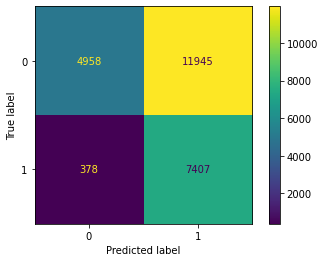

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test_oe, best_dtc.predict(features_test_oe))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Проверяем модель RandomForestClassifier():

In [38]:
%%time

pipe = Pipeline(steps=[('scaler', scaler), ('rfc', rfc)]) # Создаем пайплайн

# Задаем решетку параметров пайплайна
param_grid = {'rfc__n_estimators': [110],
             'rfc__max_features': ['sqrt', 'log2', None],
             'rfc__max_depth': [1],
             'rfc__class_weight': ['balanced']}

# Создаем нашу модель и передаем ей пайплайн, решетку параметров, также используем кросс-валидацию результата    
grid_search_cv = GridSearchCV(pipe, param_grid, n_jobs=16, cv=6, scoring=f1)

# Обучаем модель на тренировочной части выборки:
grid_search_cv.fit(features_train_oe, target_train_oe)

best_params_rfc = grid_search_cv.best_params_ # Лучшие параметры
best_rfc = grid_search_cv.best_estimator_ # Лучшая модель
best_rfc_score = grid_search_cv.best_score_ # Лучший результат

print(f'Полнота модели {best_rfc[1]} на тренировочной выборке составила: \
        {best_rfc_score} с параметрами {best_params_rfc}')

Полнота модели RandomForestClassifier(class_weight='balanced', max_depth=1, max_features=None,
                       n_estimators=110, random_state=12345) на тренировочной выборке составила:         0.4606917459262834 с параметрами {'rfc__class_weight': 'balanced', 'rfc__max_depth': 1, 'rfc__max_features': None, 'rfc__n_estimators': 110}
CPU times: user 1.82 s, sys: 408 ms, total: 2.23 s
Wall time: 51 s


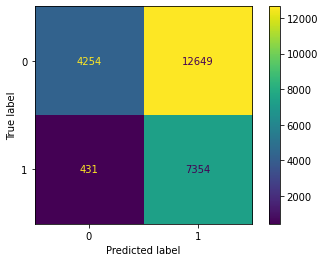

In [39]:
cm = confusion_matrix(target_test_oe, best_rfc.predict(features_test_oe))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Проверяем модель GradientBoostingClassifier():

In [40]:
%%time

pipe = Pipeline(steps=[('scaler', scaler), ('gbc', gbc)]) # Создаем пайплайн

# Задаем решетку параметров пайплайна
param_grid = {'gbc__max_depth': [4],
             'gbc__n_estimators': [150],
             'gbc__max_leaf_nodes': [5]}

# Создаем нашу модель и передаем ей пайплайн, решетку параметров, также используем кросс-валидацию результата    
grid_search_cv = GridSearchCV(pipe, param_grid, n_jobs=16, cv=6, scoring=f1)

# Обучаем модель на тренировочной части выборки:
grid_search_cv.fit(features_train_oe, target_train_oe)

best_params_gbc = grid_search_cv.best_params_ # Лучшие параметры
best_gbc = grid_search_cv.best_estimator_ # Лучшая модель
best_gbc_score = grid_search_cv.best_score_ # Лучший результатат

print(f'Полнота модели {best_gbc[1]} на тренировочной выборке составила: \
        {best_gbc_score} с параметрами {best_params_gbc}')

Полнота модели GradientBoostingClassifier(max_depth=4, max_leaf_nodes=5, n_estimators=150,
                           random_state=12345) на тренировочной выборке составила:         0.24620972662145238 с параметрами {'gbc__max_depth': 4, 'gbc__max_leaf_nodes': 5, 'gbc__n_estimators': 150}
CPU times: user 8.54 s, sys: 78.5 ms, total: 8.61 s
Wall time: 1min 2s


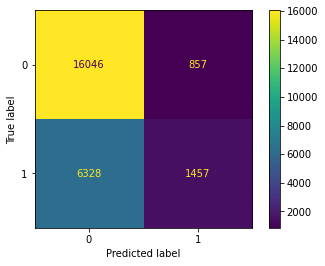

In [41]:
cm = confusion_matrix(target_test_oe, best_gbc.predict(features_test_oe))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Проверяем модель LogisticRegression():

In [42]:
%%time

pipe = Pipeline(steps=[('scaler', scaler), ('lr', lr)]) # Создаем пайплайн

# Задаем решетку параметров пайплайна
param_grid = {'lr__max_iter': [400],
             'lr__penalty': ['l2', 'none'],
             'lr__class_weight': ['balanced']}

# Создаем нашу модель и передаем ей пайплайн, решетку параметров, также используем кросс-валидацию результата    
grid_search_cv = GridSearchCV(pipe, param_grid, n_jobs=16, cv=6, scoring=f1)

# Обучаем модель на тренировочной части выборки:
grid_search_cv.fit(features_train_ohe, target_train_ohe)

best_params_lr = grid_search_cv.best_params_ # Лучшие параметры
best_lr = grid_search_cv.best_estimator_ # Лучшая модель
best_lr_score = grid_search_cv.best_score_ # Лучший результатат

print(f'Полнота модели {best_lr[1]} на тренировочной выборке составила: \
        {best_lr_score} с параметрами {best_params_lr}')

Полнота модели LogisticRegression(class_weight='balanced', max_iter=400, penalty='none',
                   random_state=12345) на тренировочной выборке составила:         0.4173215675493127 с параметрами {'lr__class_weight': 'balanced', 'lr__max_iter': 400, 'lr__penalty': 'none'}
CPU times: user 1.4 s, sys: 1.63 s, total: 3.04 s
Wall time: 9.61 s


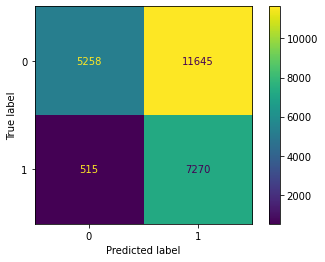

In [43]:
cm = confusion_matrix(target_test_ohe, best_lr.predict(features_test_ohe))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [44]:
features_train_ohe

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,meal_FB,meal_HB,meal_SC,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,7,2015,7,27,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,14,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,9,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,85,2015,7,27,1,0,3,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,23,2016,12,53,30,2,4,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
65225,53,2016,12,53,31,2,3,2,0,0,0,0,0,0,0,0,3,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
65226,7,2016,12,53,31,2,4,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
65227,17,2016,12,53,30,2,5,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [45]:
data_dict['test_data']['model_predict'] = best_dtc.predict(features_test_oe)

Функция 'model_profit' подсчета прибыли-убытков для каждого клиента учитываю предсказания модели:

In [46]:
def model_profit(row):
    
    room_type = row['reserved_room_type']
    total_nights = row['total_nights']
    month = row['arrival_date_month']
    price_per_night = NIGHT_PRICE_DICT[row['reserved_room_type']]
    koeficient = 1
    
    if 6 <= month <= 8:
        
        koeficient += SUMMER_COEFFICIENT
        
    elif 3 <= month <= 5:
        
        koeficient += SPRING_COEFFICIENT
        
    elif 9 <= month <= 11:
        
        koeficient += AUTUMN_COEFFICIENT

    if row['is_canceled'] == 0:
        
        return total_nights * price_per_night * koeficient - SERVICE_PRICE_DICT[room_type] * (1 + total_nights // 2)
            
    else:
        if row['is_canceled'] == 1 and row['model_predict'] == 1:
        
            return (-price_per_night * koeficient - SERVICE_PRICE_DICT[room_type]) * (1 - DEPOSIT)
    
        elif row['is_canceled'] == 1 and row['model_predict'] == 0:
        
            return - price_per_night * koeficient - SERVICE_PRICE_DICT[room_type]
        
        else:
        
            return 0
    


Применяем функцию 'model_profit' для подсчета прибыли модели, данные запишем в столбец 'model_profit':

In [47]:
data_dict['test_data']['model_profit'] = data_dict['test_data'].apply(model_profit, axis=1)

Подсчитаем прибль которую модель принесет с учетом бюджета на разработку:

In [48]:
model_loss = - data_dict['test_data'].query('is_canceled == 1')['model_profit'].sum()

model_profit = no_model_loss - model_loss - ML_BUDGET
print(f'Модель принесет {model_profit} с учетом затрат на разработку')

Модель принесет 7641968.0 с учетом затрат на разработку


### Шаг 5. Опишите портрет «ненадёжного» клиента

In [49]:
general_data = data_dict['train_data'].merge(data_dict['test_data'], how='outer')

drop_list = ['profit', 'model_predict', 'model_profit']
general_data = general_data.drop(columns=drop_list, axis=1)

general_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,7,2015,7,27,1,0,1,1,0,0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,0,14,2015,7,27,1,0,2,2,0,0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,0,0,2015,7,27,1,0,2,2,0,0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,0,9,2015,7,27,1,0,2,2,0,0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,1,85,2015,7,27,1,0,3,2,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


Для определения ненадежного клиента выведем данные по коррелирующим признакам в разрезе частоты:

In [50]:
for colum_name in data_dict['train_data'].columns:

    table = general_data.groupby([colum_name]).agg({'is_canceled': ['sum', 'count']}).sort_values(by=[('is_canceled', 'sum')], ascending=False).head(3)
    table[('is_canceled', 'share')] = round(table[('is_canceled', 'sum')] / (table[('is_canceled', 'count')]/100), 2)
    display(pd.DataFrame(table))

is_canceled              
                    sum  count  share
is_canceled                          
1                 18933  18933  100.0
0                     0  49590    0.0

is_canceled             
                  sum count  share
lead_time                         
0                 251  4401   5.70
12                186   748  24.87
18                185   609  30.38

is_canceled              
                          sum  count  share
arrival_date_year                          
2016                     9105  33993  26.78
2017                     7785  24688  31.53
2015                     2043   9842  20.76

is_canceled             
                           sum count  share
arrival_date_month                         
8                         2323  7442  31.21
7                         2283  7201  31.70
4                         2072  6644  31.19

is_canceled             
                                 sum count  share
arrival_date_week_number                         
18                               604  1745  34.61
33                               582  1799  32.35
28                               581  1742  33.35

is_canceled             
                                  sum count  share
arrival_date_day_of_month                         
27                                703  2346  29.97
26                                692  2354  29.40
17                                689  2354  29.27

is_canceled              
                                sum  count  share
stays_in_weekend_nights                          
0                              7326  28419  25.78
2                              6107  20398  29.94
1                              5328  19190  27.76

is_canceled              
                             sum  count  share
stays_in_week_nights                          
2                           5120  17536  29.20
3                           4210  14008  30.05
1                           4151  18266  22.73

is_canceled              
               sum  count  share
adults                          
2            14815  50834  29.14
1             2561  13065  19.60
3             1476   4396  33.58

is_canceled              
                 sum  count  share
children                          
0              17138  63174  27.13
1               1020   3382  30.16
2                768   1946  39.47

is_canceled              
               sum  count  share
babies                          
0            18829  67902  27.73
1              104    614  16.94
2                0      7   0.00

is_canceled              
             sum  count  share
meal                          
BB         14226  53858  26.41
SC          3249   9297  34.95
HB          1409   5203  27.08

is_canceled              
                sum  count  share
country                          
PRT            7105  19894  35.71
GBR            1595   7619  20.93
FRA            1530   7812  19.59

is_canceled              
                             sum  count  share
distribution_channel                          
TA/TO                      17115  55385  30.90
Direct                      1277   9003  14.18
Corporate                    511   3966  12.88

is_canceled              
                          sum  count  share
is_repeated_guest                          
0                       18714  66080  28.32
1                         219   2443   8.96

is_canceled              
                               sum  count  share
previous_cancellations                          
0                            17991  67150  26.79
1                              884   1156  76.47
2                               25     81  30.86

is_canceled              
                                       sum  count  share
previous_bookings_not_canceled                          
0                                    18803  66011  28.48
1                                       48   1004   4.78
2                                       24    411   5.84

is_canceled              
                           sum  count  share
reserved_room_type                          
A                        12496  47071  26.55
D                         4242  13852  30.62
E                          987   3740  26.39

is_canceled              
                        sum  count  share
booking_changes                          
0                     17115  56877  30.09
1                      1063   7979  13.32
2                       566   2639  21.45

is_canceled              
                             sum  count  share
days_in_waiting_list                          
0                          18676  67868  27.52
31                            10     11  90.91
44                             8     18  44.44

is_canceled              
                        sum  count  share
customer_type                            
Transient             17133  57310  29.90
Transient-Party        1361   8588  15.85
Contract                412   2208  18.66

is_canceled              
                                    sum  count  share
required_car_parking_spaces                          
0                                 18933  63477  29.83
1                                     0   5025   0.00
2                                     0     17   0.00

is_canceled              
                                  sum  count  share
total_of_special_requests                          
0                               11459  33908  33.79
1                                5145  23268  22.11
2                                1984   9326  21.27

is_canceled              
                     sum  count  share
total_nights                          
3                   4685  15504  30.22
4                   3618  11780  30.71
2                   3578  12981  27.56

Ненадежный клиент как правило :

 1. Как правило бронирует номер на двоих персон
 2. Без детей
 3. Предпочитает питание BB
 4. Из Португалии
 5. Сразу подтверждает заказ
 6. Не делает специальных запросов
 7. Канал дистрибуции заказа TA/TO
 8. Бронирует впервые
 9. Предпочитает тип А номера
 10. Не изменяет бронирование
 11. Не указывает надобность парковочного номера

### Шаг 6. Напишите общий вывод

Мы загрузили данные и ознакомились с ними. Привели данные к нужным типам, закодировали столбцы содержащие категоральные значения, ознакомились с распределение целевого признака, отфильтровали данные от выбросов, нашли признаки с которыми коррелирует целевой признак.

Затем мы подсчитали прибыль которую получает сеть отелей без внедрение модели, подсчитали какие убытки несет сеть.


Мы попробовали несколько видов моделей на тренировочной выборке и выяснили что модель DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=11,
                       random_state=12345) с параметрами {'dtc__class_weight': 'balanced', 'dtc__max_depth': 4, 'dtc__max_features': 11} показала наилучший результат. 

Метрика по которой мы выбирали модель это максимальные TP и минимальные FN показатели, если рассматривать метрику с точки зрения бизнеса нам нужна модель которая предскажет как можно больше TP целевых значений, в тоже время модель должна давать как можно меньше FN прогнозов чтобы не принуждать "надежных клиентов" вносить предоплату.

Для повышения метрики мы использовали поиск по сетке параметров и повысили точность модели. Так же мы подсчитали что наша модель принесет прибыль в размере 7641968.0 с учетом затрат  на разработку. И наконец мы составили портрет ненадежного клиента:


Ненадежный клиент как правило :

 1. Бронирует номер на двоих персон
 2. Без детей
 3. Предпочитает питание BB
 4. Из Португалии
 5. Сразу подтверждает заказ
 6. Не делает специальных запросов
 7. Канал дистрибуции заказа TA/TO
 8. Бронирует впервые
 9. Предпочитает тип А номера
 10. Не изменяет бронирование
 11. Не указывает надобность парковочного номера